# Uber Analysis #

**To:** Operations & Strategy Stakeholders (Uber Rides Division)

**From:** Jean Fernandes (Data Analytics Team)

**Subject:** Analysis of Ride Data for Operational Insights - Draft



## Executive Summary

We analyzed the dataset...

## Loading the data

In [46]:
#loading the data
import pandas as pd

df = pd.read_csv("data/ncr_ride_bookings.csv")

# print(df.shape)
df.head()
# df.info()
# df.isnull().sum()


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


### 1. Ride Duration & Revenue Distributions  


- Provide summary statistics (**mean, median, variance, percentiles**).  
- Identify whether durations and revenues follow any known **continuous probability distributions**. 

Since we are working with trip duration and revenue, I will be using the following columns: Avg CTAT (Customer Trip Arrival Time) for trip duration, and Booking value for revenue. After a preliminary analysis of the data, we concluded that the dataset represents panel data as every row is a booking event with different attributes (time, ID, status).

In [47]:
# First we will filter only completed rides
df_completed = df[(df['Booking Status'] == "Completed") &
                   (df['Booking Value'].notnull()) &
                    (df['Avg CTAT'].notnull())]



In [48]:
# Separating the two columns that we need
df_analysis = df_completed[['Booking Value', 'Avg CTAT']].copy()

#changing the name for clarity
df_analysis.rename(columns={
    'Avg CTAT': 'Ride_Duration',
    'Booking Value': 'Revenue' }, inplace=True)

df_analysis.head()


,Revenue,Ride_Duration
2,627.0,25.8
3,416.0,28.5
4,737.0,19.6
5,316.0,18.1
6,640.0,20.4


In [49]:
# Enhanced version
styled_combined = pd.DataFrame({
    'Mean': df_analysis.mean().round(0).astype(int),
    'Median': df_analysis.median().round(0).astype(int),
    'Std Dev': df_analysis.std().round(0).astype(int),
    'Variance': df_analysis.var().round(0).astype(int)
}).style\
    .set_properties(**{'text-align': 'center'})\
    .background_gradient(
        subset=['Mean', 'Median'], cmap="Blues")\
    .background_gradient(
        subset=['Std Dev', 'Variance'], cmap="Greens")\
    .format({
        'Revenue': '${:.2f}',
        'Ride_Duration': '{:.2f} min'
    })\
    .set_caption("Ride Statistics Summary")\
    .set_table_styles([
        {'selector': 'caption', 'props': [
            ('caption-side', 'top'),
            ('font-size', '16px'),
            ('font-weight', 'bold')]},
        {'selector': 'th', 'props': [
            ('background-color', '#f0f0f0'),
            ('padding', '8px')]},
        {'selector': 'td', 'props': [
            ('padding', '8px'),
            ('border', '1px solid #ddd')]},
        {'selector': 'tr:hover', 'props': [
            ('background-color', '#f5f5f5')]}
    ])

display(styled_combined)

,Mean,Median,Std Dev,Variance
Revenue,508,414,396,156863
Ride_Duration,30,30,9,75


## Business Insight:


**1. Central Tendency:**
<br>
    - Revenue: mean (508.17) is higher than the median (414.00), indicating right-skewed distribution. 
    <br>
    - Ride Duration: mean (30.03) is almost equal to median (30.00), indicating symmetry. <br>
    <br>

**2. Dispersion:**<br>
    - Revenue: high variance (156,863.00) and standard deviation (396) showing wide spread.
    <br>
    - Ride Duration: variance (74.83) and standard deviation (8.65) showing consistent trip times.
<br>

### Percentiles

,25th Percentile,50th Percentile (Median),75th Percentile,90th Percentile,95th Percentile
Revenue,234,414,689,958,1222
Ride_Duration,23,30,38,42,44


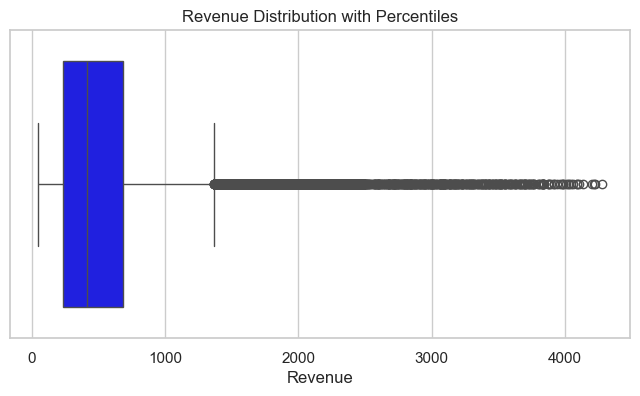

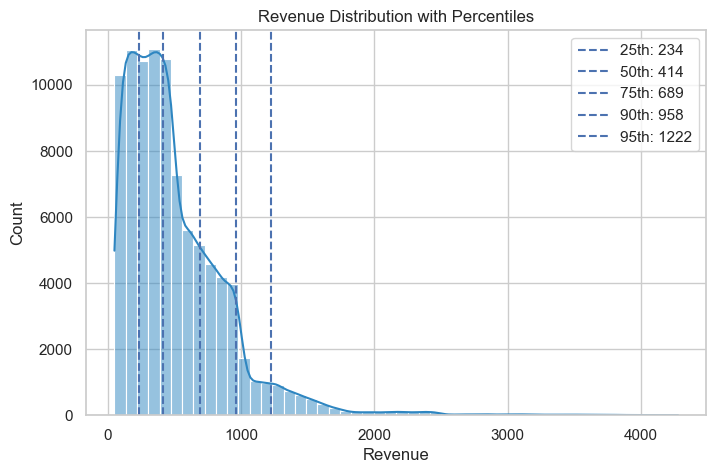

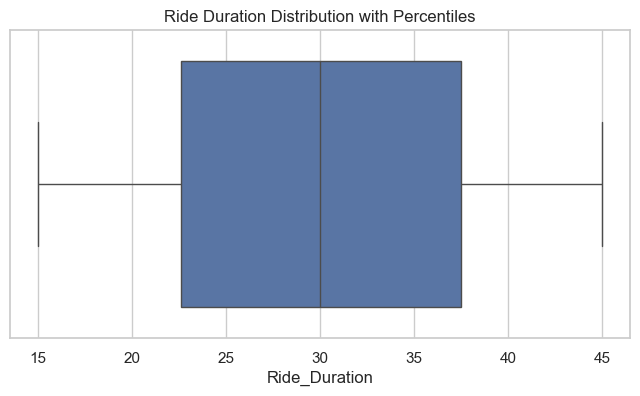

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Percentile summary with style
percentile = pd.DataFrame({
    '25th Percentile': df_analysis.quantile(0.25).round(0).astype(int),
    '50th Percentile (Median)': df_analysis.quantile(0.50).round(0).astype(int),
    '75th Percentile': df_analysis.quantile(0.75).round(0).astype(int),
    '90th Percentile': df_analysis.quantile(0.90).round(0).astype(int),
    '95th Percentile': df_analysis.quantile(0.95).round(0).astype(int)
}).style\
    .set_properties(**{'text-align': 'center'})\
    .background_gradient(
        subset=['25th Percentile', '75th Percentile', '95th Percentile'], cmap="Blues")\
    .background_gradient(
        subset=['50th Percentile (Median)', '90th Percentile'], cmap="Greens")\
    .format({
        'Revenue': '${:.2f}',
        'Ride_Duration': '{:.2f} min'
    })\
    .set_caption("Percentile Summary")\
    .set_table_styles([
        {'selector': 'caption', 'props': [
            ('caption-side', 'top'),
            ('font-size', '16px'),
            ('font-weight', 'bold')]},
        {'selector': 'th', 'props': [
            ('background-color', '#f0f0f0'),
            ('padding', '8px')]},
        {'selector': 'td', 'props': [
            ('padding', '8px'),
            ('border', '1px solid #ddd')]},
        {'selector': 'tr:hover', 'props': [
            ('background-color', '#f5f5f5')]}
    ])


display(percentile)

#revenue boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=df_analysis['Revenue'], color="blue")
plt.title("Revenue Distribution with Percentiles")
plt.show()

#revenue histplot
plt.figure(figsize=(8,5))
sns.histplot(df_analysis['Revenue'], bins=50, kde=True, color="#2E86C1")

for p in [25, 50, 75, 90, 95]:
    value = np.percentile(df_analysis['Revenue'], p)
    plt.axvline(value, linestyle='--', label=f'{p}th: {value:.0f}')

plt.legend()
plt.title("Revenue Distribution with Percentiles")
plt.show()

#Ride Duration boxplot
plt.figure(figsize=(8,4))
sns.boxplot(x=df_analysis['Ride_Duration'])
plt.title("Ride Duration Distribution with Percentiles")
plt.show()


### Business Insight:

**Percentile Analysis: Revenue Distribution**
   - Revenue Distribution:
     * 25th percentile: Lower quarter of trips generate less than 234 units
     * 50th percentile (median): Half of trips earn below 414 units
     * 75th percentile: Upper quarter of trips exceed 689 units
     * 90th–95th percentiles: A small group of high-value trips generate revenues well above 958–1222 units, with outliers reaching into the thousands.

**Percentile Analysis: Ride Duration Distribution**
   - Ride Duration Distribution:
     * 25th percentile: Lower quarter of trips generate less than 23
     * 50th percentile (median): Half of trips earn below 30
     * 75th percentile: Upper quarter of trips exceed 38
     * 90th/95th percentiles show values close together 42 and 44



### 1.2 Known Continuous Probability Distributions

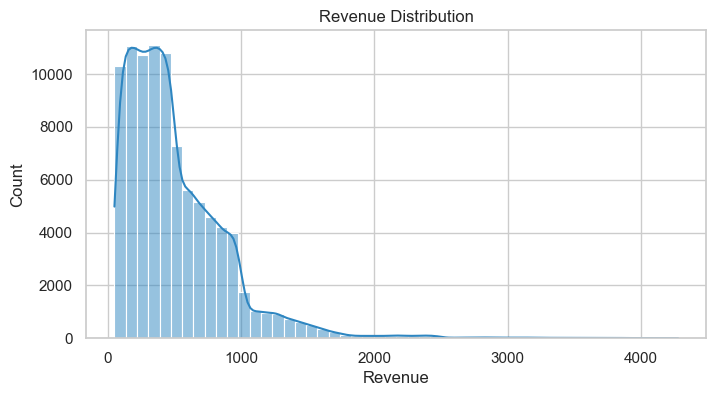

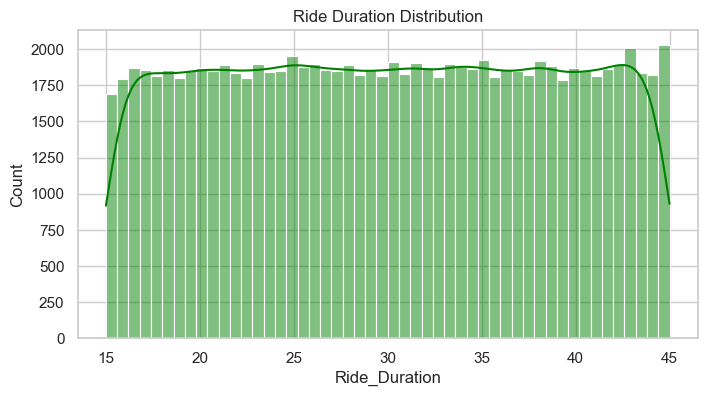

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Revenue
plt.figure(figsize=(8,4))
sns.histplot(df_analysis['Revenue'], bins=50, kde=True, color="#2E86C1")
plt.title("Revenue Distribution")
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df_analysis['Ride_Duration'], bins=50, kde=True, color="green")
plt.title("Ride Duration Distribution")
plt.show()
    

In [53]:
#Normality Tests

from scipy.stats import shapiro, kstest, norm

#Shapiro cant handle large datases, so i sampled.
duration_sample = df_analysis['Ride_Duration'].sample(5000, random_state=1)
revenue_sample = df_analysis['Revenue'].sample(5000, random_state=1)

shapiro_duration = shapiro(duration_sample)
shapiro_revenue = shapiro(revenue_sample)

shapiro_duration, shapiro_revenue

(ShapiroResult(statistic=0.9565726167614274, pvalue=3.2814153069430755e-36),
 ShapiroResult(statistic=0.8175231859892677, pvalue=7.200972692425216e-60))

### Distribution Results

- The Shapiro test yielded a p-value of < 0.001 for both, showing a strong evidence that neither are normally distributed.

**Revenue** is strongly right-skewed: most trips generate low values, and a small number of values generate much higher revenues.

**Ride Duration** follows a uniform distribution with trips being equally likely. This indicates that the trip durations are spread evenly. 

In [54]:
#Revenue Log-Normal Distribution Test
from scipy.stats import lognorm, kstest
import numpy as np

shape, loc, scale = lognorm.fit(df_analysis['Revenue'], floc=0)

ks_revenue = kstest(df_analysis['Revenue'], 'lognorm', args=(shape, loc, scale))
ks_revenue

KstestResult(statistic=0.04249273012295918, pvalue=2.364500444409116e-146, statistic_location=352.0, statistic_sign=-1)

- Log-Normal resulted on a very small p value as shown above. We can confidently conclude that the dataset is not log-normally distributed.

In [55]:
# Ride Duration Uniform Test
from scipy.stats import uniform

a, b = df_analysis['Ride_Duration'].min(), df_analysis['Ride_Duration'].max()
ks_duration = kstest(df_analysis['Ride_Duration'], 'uniform', args=(a, b-a))
ks_duration

KstestResult(statistic=0.004333333333333356, pvalue=0.060661714157751456, statistic_location=22.8, statistic_sign=-1)

- We performed the Kolmogorov-Smirnov test to assess the uniform distribution. The result was not significant at the alpha 0.05 level (p = 0.06), indicating that we cannot reject the null hypothesis. After visual inspection of the histogram, we can confirm that the data is largely consistent with a uniform distribution. 

### Business Insight:

The **Revenue** variable is strongly right-skewed, reflecting a heavy-tailed distribution with most values clustered at the lower end. It does not follow a normal or log-normal distribution. In contrast, **Ride Duration** follows a uniform distribution between 15 and 45 minutes, a finding supported by a Kolmogorov-Smirnov test and confirmed visually.

# 2. Customer Experience & Ratings  
- What is the **probability of a ride receiving a rating ≥ 4**?  

We will use the column Driver Ratings. 

In [56]:
# Filtering the valid ratings
ratings = df['Driver Ratings'].dropna()

# Total rides with ratings
total_rated = len(ratings)
print(total_rated, "rated trips")

# Probability of rating >= 4
prob_rating_4_or_above = (ratings >= 4).mean()
prob_rating_4_or_above

93000 rated trips


0.7739677419354839

Among rides where customers provided a rating, 77% received a score of 4 or higher. This indicates that most completed trips are positively rated. 

- How does this probability change **conditional on vehicle type** (e.g., SUV vs Sedan)?

In [57]:
# Filtering rides with a valid rating

df_ratings = df[['Driver Ratings', 'Vehicle Type']].dropna()

# Prob of >= 4 grouped by vehicle type
prob_by_vehicle = (
    df_ratings.groupby('Vehicle Type')['Driver Ratings']
    .apply(lambda x: (x >= 4).mean())
    .sort_values(ascending=False)
)

prob_by_vehicle

Vehicle Type
Uber XL          0.780453
Premier Sedan    0.777462
Auto             0.775945
Go Sedan         0.774406
Bike             0.772339
eBike            0.771027
Go Mini          0.770284
Name: Driver Ratings, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

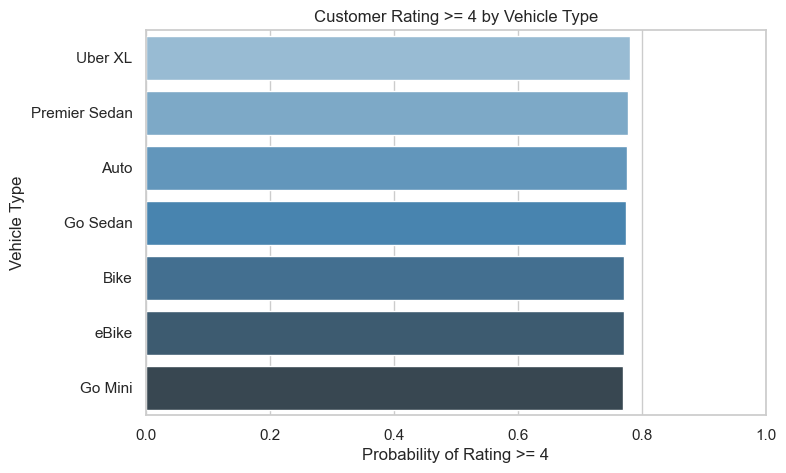

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x=prob_by_vehicle.values, y=prob_by_vehicle.index, hue=prob_by_vehicle.index, palette="Blues_d", legend=False)
plt.xlabel("Probability of Rating >= 4")
plt.ylabel("Vehicle Type")
plt.title("Customer Rating >= 4 by Vehicle Type")
plt.xlim(0,1)
plt.show



As we can see on the barplot above, the vehicle type does not significantly affect the probability of receiving a rating ≥ 4.

# 3. Operational Efficiency  
- Model the **number of rides per day** as a discrete random variable.  
- Estimate the **probability of exceeding certain ride count thresholds** on weekdays vs weekends.  

In [64]:
# Converting to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Counting rides per day
rides_per_day = df.groupby(df['Date']).size().reset_index()

# Renaming columns
rides_per_day.columns = ['Date', 'Ride_Count']

rides_per_day.head()

,Date,Ride_Count
0,2024-01-01,414
1,2024-01-02,389
2,2024-01-03,384
3,2024-01-04,414
4,2024-01-05,416


As shown above, rides_per_day is the discrete random variable. 

In [69]:
# Creating a weekday/weekend indicator
rides_per_day['DayOfWeek'] = rides_per_day['Date'].dt.day_name()
rides_per_day['Weekend'] = rides_per_day['DayOfWeek'].isin(['Saturday','Sunday'])

rides_per_day.head()



,Date,Ride_Count,DayOfWeek,Weekend
0,2024-01-01,414,Monday,False
1,2024-01-02,389,Tuesday,False
2,2024-01-03,384,Wednesday,False
3,2024-01-04,414,Thursday,False
4,2024-01-05,416,Friday,False


As shown above, I edited the table to display the ride count, the day of the week, and a boolean indicator to return true or false if the day is a weekend.

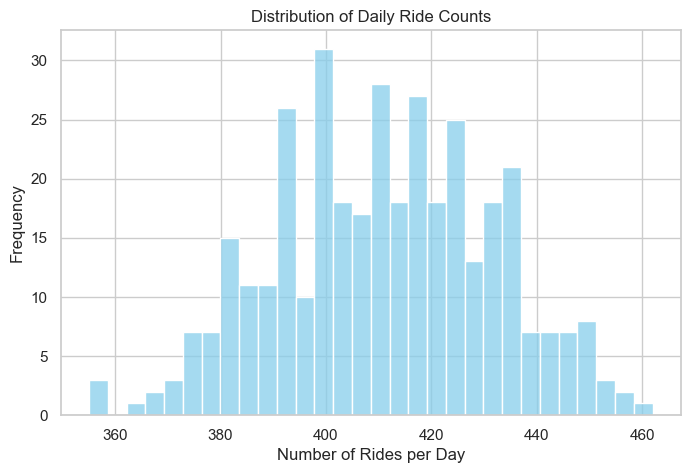

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Daily Ride Counts histogram
plt.figure(figsize=(8,5))
sns.histplot(rides_per_day['Ride_Count'], bins=30, kde=False, color="skyblue")
plt.title("Distribution of Daily Ride Counts")
plt.xlabel("Number of Rides per Day")
plt.ylabel("Frequency")
plt.show()

The histogram above shows the frequency of daily ride counts. As we can see, it resembles a bell-shaped distribution centered around the mean, with most values concentrated near the middle and fewer values at the extremes. 

In [85]:
# Estimating Probability of Exceeding Thresholds
threshold = 450

# Weekday 
weekday_prob = (rides_per_day.loc[rides_per_day['Weekend'] == False, 'Ride_Count'] > threshold).mean()

#Weekend
weekend_prob = (rides_per_day.loc[rides_per_day['Weekend'] == True, 'Ride_Count'] > threshold).mean()

weekday_prob, weekend_prob


(0.022988505747126436, 0.028846153846153848)

We modeled the number of rides as a discrete random variable and calculated the empirical probability of exceeding specific thresholds directly from the data.